## Introduction

Note: This is one of the two complementary competitions that together comprise the M5 forecasting challenge. Can you estimate, as precisely as possible, the point forecasts of the unit sales of various products sold in the USA by Walmart? If you are interested in estimating the uncertainty distribution of the realized values of the same series, be sure to check out its companion competition

How much camping gear will one store sell each month in a year? To the uninitiated, calculating sales at this level may seem as difficult as predicting the weather. Both types of forecasting rely on science and historical data. While a wrong weather forecast may result in you carrying around an umbrella on a sunny day, inaccurate business forecasts could result in actual or opportunity losses. In this competition, in addition to traditional forecasting methods you’re also challenged to use machine learning to improve forecast accuracy.

The Makridakis Open Forecasting Center (MOFC) at the University of Nicosia conducts cutting-edge forecasting research and provides business forecast training. It helps companies achieve accurate predictions, estimate the levels of uncertainty, avoiding costly mistakes, and apply best forecasting practices. The MOFC is well known for its Makridakis Competitions, the first of which ran in the 1980s.

In this competition, the fifth iteration, you will use hierarchical sales data from Walmart, the world’s largest company by revenue, to forecast daily sales for the next 28 days. The data, covers stores in three US States (California, Texas, and Wisconsin) and includes item level, department, product categories, and store details. In addition, it has explanatory variables such as price, promotions, day of the week, and special events. Together, this robust dataset can be used to improve forecasting accuracy.

If successful, your work will continue to advance the theory and practice of forecasting. The methods used can be applied in various business areas, such as setting up appropriate inventory or service levels. Through its business support and training, the MOFC will help distribute the tools and knowledge so others can achieve more accurate and better calibrated forecasts, reduce waste and be able to appreciate uncertainty and its risk implications.

Acknowledgements Additional thanks go to other partner organizations and prize sponsors, National Technical University of Athens (NTUA), INSEAD, Google, Uber and IIF.

In [ ]:
# <font color = blue> Business Understanding </font>

In [ ]:
#Connect to Kaggle with API

In [1]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 KB 1.2 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=239e796b60bc4a6a2c36224143a1d3a7b3d75e33a1d4e4be0074853cff8001da
  Stored in directory: /home/ec2-user/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [15]:
ls -al /home/ec2-user/SageMaker

total 928
drwxr-xr-x  6 ec2-user ec2-user   4096 Jul 30 21:46 ./
drwx------ 24 ec2-user ec2-user   4096 Jul 30 21:42 ../
-rw-rw-r--  1 ec2-user ec2-user 891714 Jul 30 21:46 Deamand_Forecast_EDA.ipynb
drwxrwxr-x  2 ec2-user ec2-user   4096 Jul 30 21:44 .ipynb_checkpoints/
-rw-rw-r--  1 ec2-user ec2-user     65 Jul 30 21:44 kaggle.json
drwx------  2 root     root      16384 Jul 30 21:25 lost+found/
drwxr-xr-x  2 ec2-user ec2-user   4096 Jul 30 21:25 .sparkmagic/
drwxrwxr-x  2 ec2-user ec2-user   4096 Jul 30 21:39 Untitled Folder/
-rw-rw-r--  1 ec2-user ec2-user  15855 Jul 30 21:39 Untitled.ipynb


In [17]:
!sudo mkdir -p /root/.kaggle
!sudo cp /home/ec2-user/SageMaker/'kaggle.json' /home/ec2-user/.kaggle/
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [ ]:
#!mkdir -p /root/.kaggle

In [ ]:
#ls -al /root/.kaggle/

In [18]:
api.competitions_list(category='gettingStarted')

[contradictory-my-dear-watson,
 gan-getting-started,
 store-sales-time-series-forecasting,
 tpu-getting-started,
 digit-recognizer,
 titanic,
 house-prices-advanced-regression-techniques,
 connectx,
 nlp-getting-started,
 spaceship-titanic,
 facial-keypoints-detection,
 street-view-getting-started-with-julia,
 word2vec-nlp-tutorial,
 data-science-london-scikit-learn,
 just-the-basics-the-after-party,
 just-the-basics-strata-2013]

In [19]:
m5_forecasting=api.competitions_list(search='m5-forecasting-accuracy')

In [20]:
m5_forecasting[0]

m5-forecasting-accuracy

In [21]:
api.competition_list_files('m5-forecasting-accuracy')

[calendar.csv,
 sales_train_validation.csv,
 sell_prices.csv,
 sample_submission.csv,
 sales_train_evaluation.csv]

In [22]:
api.competition_download_files('m5-forecasting-accuracy')

In [23]:
from functools import reduce
files=api.competition_list_files('m5-forecasting-accuracy')
files_noext=list(map(lambda x: str(x).rsplit('.', 1)[0], files))
files_noext

['sample_submission',
 'sales_train_validation',
 'sell_prices',
 'sales_train_evaluation',
 'calendar']

In [ ]:
# DF_list = list()

# for f in files_noext:
#     df=pd.DataFrame()
#     print(f)
#     df.name=f
#     DF_list.append(df)

# DF_list

sell_prices
sample_submission
sales_train_evaluation
calendar
sales_train_validation


[Empty DataFrame
 Columns: []
 Index: [], Empty DataFrame
 Columns: []
 Index: [], Empty DataFrame
 Columns: []
 Index: [], Empty DataFrame
 Columns: []
 Index: [], Empty DataFrame
 Columns: []
 Index: []]

In [ ]:
# for f in files:
#   print(f)
#   print(str(f).rsplit('.', 1))


In [24]:
from zipfile import ZipFile
zf = ZipFile('m5-forecasting-accuracy.zip')
zf.extractall('drive/MyDrive/M5') #save files in selected folder
zf.close()

In [25]:
ls -al drive/MyDrive/M5

total 439936
drwxrwxr-x 2 ec2-user ec2-user      4096 Jul 30 21:47 ./
drwxrwxr-x 3 ec2-user ec2-user      4096 Jul 30 21:47 ../
-rw-rw-r-- 1 ec2-user ec2-user    103469 Jul 30 21:47 calendar.csv
-rw-rw-r-- 1 ec2-user ec2-user 121736518 Jul 30 21:47 sales_train_evaluation.csv
-rw-rw-r-- 1 ec2-user ec2-user 120007726 Jul 30 21:47 sales_train_validation.csv
-rw-rw-r-- 1 ec2-user ec2-user   5228786 Jul 30 21:47 sample_submission.csv
-rw-rw-r-- 1 ec2-user ec2-user 203395785 Jul 30 21:47 sell_prices.csv


- **calendar.csv** - Contains information about the dates on which the products are sold.
- **sales_train_validation.csv** - Contains the historical daily unit sales data per product and store [d_1 - d_1913]
- **sample_submission.csv** - The correct format for submissions. Reference the Evaluation tab for more info.
- **sell_prices.csv** - Contains information about the price of the products sold per store and date.
- **sales_train_evaluation.csv** - Includes sales [d_1 - d_1941] (labels used for the Public leaderboard)

## What exactly are we trying to predict?
We are trying for forecast sales for 28 forecast days. The sample submission has the following format:

- The columns represent 28 forecast days. We will fill these forecast days with our predictions.
- The rows each represent a specific item. This id tells us the item type, state, and store. We don't know what these items are exactly.

In [3]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly
from plotly import tools
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
# !pip install downcast
from downcast import reduce

In [4]:
#list max columns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

#EDA

In [5]:
#lets read all the 5 files that we have unziped 
PATH='drive/MyDrive/M5'
PATH

'drive/MyDrive/M5'

In [6]:
calendar = pd.read_csv(PATH+'/calendar.csv')
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0



Contains information about the dates the products are sold.
- date: The date in a “y-m-d” format.
- wm_yr_wk: The id of the week the date belongs to.
- weekday: The type of the day (Saturday, Sunday, ..., Friday).
- wday: The id of the weekday, starting from Saturday.
- month: The month of the date.
- year: The year of the date.
- event_name_1: If the date includes an event, the name of this event.
- event_type_1: If the date includes an event, the type of this event.
- event_name_2: If the date includes a second event, the name of this event.
- event_type_2: If the date includes a second event, the type of this event.
- snap_CA, snap_TX, and snap_WI: A binary variable (0 or 1) indicating whether the stores of CA,
TX or WI allow SNAP3 purchases on the examined date. 1 indicates that SNAP purchases are
allowed.

In [7]:
sales_train_validation = pd.read_csv(PATH+'/sales_train_validation.csv')
sales_train_validation

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,...,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,3,0,0,0,1,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,1,0,...,5,3,1,0,0,0,1,2,3,0,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,1,1,0,3,1,1,2,1,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,1,7,7,3,6,3,3,7,12,4,2,7,5,12,5,3,3,7,6,4,6,3,6,2,3,...,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,1,0,0,0,0,3,1,1,1,2,0,1,0,1,1,1,3,3,4,4,3,6,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,4,7,2,3,5,6,3,4,1,2,5,1,2,2,2,1,9,8,1,6,3,3,4,10,4,...,2,1,1,2,1,3,1,1,0,3,1,1,2,0,0,2,0,0,0,2,0,1,1,0,0,0,0,1,1,2,1,4,0,0,2,2,4,0,0,0,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,3,0,3,1,1,1,1,1,1,0,2,1,1,2,4,3,0,0,0,0,0,1,1,2,1,1,1,1,2,0,1,0,3,0,0,1,0,0,1,0,3,1,3


Contains the historical daily unit sales data per product and store.
- item_id: The id of the product.
- dept_id: The id of the department the product belongs to.
- cat_id: The id of the category the product belongs to.
- store_id: The id of the store where the product is sold.
- state_id: The State where the store is located.
- d_1, d_2, ..., d_i, ... d_1941: The number of units sold at day i, starting from 2011-01-29.
- d_1914 - d_1941 represents the validation rows which we will predict in stage 1
- d_1942 - d_1969 represents the evaluation rows which we will predict for the final competition standings.

In [8]:
sales_prices = pd.read_csv(PATH+'/sell_prices.csv')
sales_prices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


Contains information about the price of the products sold per store and date.
- store_id: The id of the store where the product is sold.
- item_id: The id of the product.
- wm_yr_wk: The id of the week.
- sell_price: The price of the product for the given week/store. The price is provided per week
(average across seven days). If not available, this means that the product was not sold during the
examined week. Note that although prices are constant at weekly basis, they may change through
time (both training and test set).

In [9]:
sales_train_evaluation = pd.read_csv(PATH+'/sales_train_evaluation.csv')
sales_train_evaluation

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,...,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,1,0,...,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,1,7,7,3,6,3,3,7,12,4,2,7,5,12,5,3,3,7,6,4,6,3,6,2,3,...,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,2,2,0,0,0,2,0,0,1,1,1,0,0,1,0,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,1,0,0,0,0,3,1,1,1,2,0,1,0,1,1,1,3,3,4,4,3,6,1,0,1,...,1,2,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,4,7,2,3,5,6,3,4,1,2,5,1,2,2,2,1,9,8,1,6,3,3,4,10,4,...,1,2,1,4,0,0,2,2,4,0,0,0,2,1,0,2,0,1,0,0,1,0,0,0,1,1,0,2,1,1,0,0,1,0,0,1,0,3,3,1,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,1,1,1,1,2,0,1,0,3,0,0,1,0,0,1,0,3,1,3,1,3,0,1,2,1,0,2,1,1,2,0,2,1,1,0,2,1,1,1,1,4,6,0,1,1,1,0


In [10]:
sample_submission = pd.read_csv(PATH+'/sample_submission.csv')
sample_submission

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
### 2.1 Inspecting the data 

In [12]:
print("Calender datsets shape -> ", calendar.shape)
print("Sales Price datsets shape -> ",sales_prices.shape)
print("Sales Train Evalution datsets shape -> ",sales_train_evaluation.shape)
print("Sample Submission datsets shape -> ",sample_submission.shape)

Calender datsets shape ->  (1969, 14)
Sales Price datsets shape ->  (6841121, 4)
Sales Train Evalution datsets shape ->  (30490, 1947)
Sample Submission datsets shape ->  (60980, 29)


In [13]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [14]:
sales_train_validation.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 1919 columns):
 #     Column    Dtype 
---    ------    ----- 
 0     id        object
 1     item_id   object
 2     dept_id   object
 3     cat_id    object
 4     store_id  object
 5     state_id  object
 6     d_1       int64 
 7     d_2       int64 
 8     d_3       int64 
 9     d_4       int64 
 10    d_5       int64 
 11    d_6       int64 
 12    d_7       int64 
 13    d_8       int64 
 14    d_9       int64 
 15    d_10      int64 
 16    d_11      int64 
 17    d_12      int64 
 18    d_13      int64 
 19    d_14      int64 
 20    d_15      int64 
 21    d_16      int64 
 22    d_17      int64 
 23    d_18      int64 
 24    d_19      int64 
 25    d_20      int64 
 26    d_21      int64 
 27    d_22      int64 
 28    d_23      int64 
 29    d_24      int64 
 30    d_25      int64 
 31    d_26      int64 
 32    d_27      int64 
 33    d_28      int64 
 34    d_29      int64 
 

In [15]:
sample_submission.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60980 entries, 0 to 60979
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60980 non-null  object
 1   F1      60980 non-null  int64 
 2   F2      60980 non-null  int64 
 3   F3      60980 non-null  int64 
 4   F4      60980 non-null  int64 
 5   F5      60980 non-null  int64 
 6   F6      60980 non-null  int64 
 7   F7      60980 non-null  int64 
 8   F8      60980 non-null  int64 
 9   F9      60980 non-null  int64 
 10  F10     60980 non-null  int64 
 11  F11     60980 non-null  int64 
 12  F12     60980 non-null  int64 
 13  F13     60980 non-null  int64 
 14  F14     60980 non-null  int64 
 15  F15     60980 non-null  int64 
 16  F16     60980 non-null  int64 
 17  F17     60980 non-null  int64 
 18  F18     60980 non-null  int64 
 19  F19     60980 non-null  int64 
 20  F20     60980 non-null  int64 
 21  F21     60980 non-null  int64 
 22  F22     60980 non-null

In [16]:
sales_train_evaluation.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 1947 columns):
 #     Column    Dtype 
---    ------    ----- 
 0     id        object
 1     item_id   object
 2     dept_id   object
 3     cat_id    object
 4     store_id  object
 5     state_id  object
 6     d_1       int64 
 7     d_2       int64 
 8     d_3       int64 
 9     d_4       int64 
 10    d_5       int64 
 11    d_6       int64 
 12    d_7       int64 
 13    d_8       int64 
 14    d_9       int64 
 15    d_10      int64 
 16    d_11      int64 
 17    d_12      int64 
 18    d_13      int64 
 19    d_14      int64 
 20    d_15      int64 
 21    d_16      int64 
 22    d_17      int64 
 23    d_18      int64 
 24    d_19      int64 
 25    d_20      int64 
 26    d_21      int64 
 27    d_22      int64 
 28    d_23      int64 
 29    d_24      int64 
 30    d_25      int64 
 31    d_26      int64 
 32    d_27      int64 
 33    d_28      int64 
 34    d_29      int64 
 

In [16]:
# # check the summary for the numeric column
# l=[sales_prices,
#  sample_submission,
#  sales_train_evaluation,
#  calendar,
#  sales_train_validation]
# # for i in files_noext:
# #   #print("#"*20+" Describing "+i+"#"*20)
# #   #print(i.encode('utf-8').decode('unicode-escape'))
# #   df = pd.DataFrame()
# #   df.name=i
# #   l.append(df)

# # print(l)
# for i in l:
#   #print("#"*20+" Describing "+str(i)+"#"*20)
#   #print(i.encode('utf-8').decode('unicode-escape'))
#   i.describe()

In [17]:
# # check the summary for the numeric column
sales_prices.describe()

,wm_yr_wk,sell_price
count,6.841121e+06,6.841121e+06
mean,1.138294e+04,4.410952e+00
std,1.486100e+02,3.408814e+00
min,1.110100e+04,1.000000e-02
25%,1.124700e+04,2.180000e+00
50%,1.141100e+04,3.470000e+00
75%,1.151700e+04,5.840000e+00
max,1.162100e+04,1.073200e+02


In [18]:
sample_submission.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
count,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
sales_train_evaluation.describe()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,...,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,0.756674,0.775927,0.779141,0.867334,1.142440,1.193178,0.715120,0.789439,0.703280,0.666382,0.777993,1.039324,0.960413,0.786028,0.672384,0.680781,0.665038,0.738898,0.980912,0.941522,0.696622,0.750148,0.723057,0.769925,0.773106,1.023352,1.143850,0.805576,0.746212,0.739915,0.742079,0.838701,1.056904,1.030403,0.817809,0.787832,0.746638,0.714300,0.782388,1.003575,...,1.850607,1.325615,1.301509,1.283503,1.250115,1.417514,1.847819,1.766350,1.391505,1.281371,1.154247,1.230863,1.370581,1.586159,1.693670,1.248245,1.232207,1.159167,1.149000,1.328862,1.605838,1.633158,1.272319,1.163890,1.129715,1.139128,1.406888,1.653952,1.739324,1.416235,1.453395,1.298819,1.336930,1.436701,1.778911,1.495867,1.521810,1.291538,1.385635,1.328403,1.445490,1.781174,1.965267,1.389374,1.271794,1.216661,1.212299,1.395605,1.689669,1.782158
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,3.665969,3.697822,3.486595,3.484608,4.636395,4.662770,2.993414,3.296922,2.811648,2.611911,2.985123,3.923110,3.597620,3.084773,2.874189,2.727852,2.637849,2.842334,3.714944,3.688771,2.708641,2.922533,2.888537,3.085799,3.136922,3.944627,4.617819,3.076988,3.011551,3.023168,2.943395,3.219799,4.112437,3.858483,3.204146,3.178801,2.945178,2.910318,2.985018,3.799143,...,4.549733,3.353388,3.375255,3.429146,3.292236,3.730618,4.619235,4.290072,3.620804,3.329683,2.933918,3.303282,3.740017,4.097191,4.359809,3.276925,3.125471,2.876026,2.950364,3.358012,4.089422,3.812248,3.237593,2.958058,2.899251,2.884903,3.601825,4.078230,4.012232,3.448094,3.629592,3.312139,3.370512,3.862338,4.529591,3.949142,3.854184,3.189395,3.557375,3.316416,3.656824,4.426550,4.706284,3.313292,3.126178,3.000348,2.955910,3.514318,4.089208,4.284356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [20]:
calendar.describe()

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


In [21]:
sales_train_validation.describe()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,...,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,0.756674,0.775927,0.779141,0.867334,1.142440,1.193178,0.715120,0.789439,0.703280,0.666382,0.777993,1.039324,0.960413,0.786028,0.672384,0.680781,0.665038,0.738898,0.980912,0.941522,0.696622,0.750148,0.723057,0.769925,0.773106,1.023352,1.143850,0.805576,0.746212,0.739915,0.742079,0.838701,1.056904,1.030403,0.817809,0.787832,0.746638,0.714300,0.782388,1.003575,...,1.876615,1.330338,1.237357,1.214562,1.255067,1.340997,1.728796,1.686487,1.378649,1.315743,1.200590,1.148213,1.300492,1.514628,1.568547,1.225320,1.163496,1.140899,1.115218,1.495933,1.766579,1.520499,1.182060,1.110430,1.061299,1.137455,1.493473,1.727517,1.850607,1.325615,1.301509,1.283503,1.250115,1.417514,1.847819,1.766350,1.391505,1.281371,1.154247,1.230863,1.370581,1.586159,1.693670,1.248245,1.232207,1.159167,1.149000,1.328862,1.605838,1.633158
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,3.665969,3.697822,3.486595,3.484608,4.636395,4.662770,2.993414,3.296922,2.811648,2.611911,2.985123,3.923110,3.597620,3.084773,2.874189,2.727852,2.637849,2.842334,3.714944,3.688771,2.708641,2.922533,2.888537,3.085799,3.136922,3.944627,4.617819,3.076988,3.011551,3.023168,2.943395,3.219799,4.112437,3.858483,3.204146,3.178801,2.945178,2.910318,2.985018,3.799143,...,4.606493,3.430893,3.266364,3.157920,3.256278,3.524594,4.379331,4.244859,3.599718,3.452243,3.138745,3.085343,3.368736,3.958988,4.116284,2.994501,2.986132,2.909689,2.934280,3.999311,4.875745,4.539663,2.932883,2.969828,2.795303,2.982687,3.696225,4.371541,4.549733,3.353388,3.375255,3.429146,3.292236,3.730618,4.619235,4.290072,3.620804,3.329683,2.933918,3.303282,3.740017,4.097191,4.359809,3.276925,3.125471,2.876026,2.950364,3.358012,4.089422,3.812248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [22]:
calendar.isnull().sum()/calendar.isnull().count()

date            0.000000
wm_yr_wk        0.000000
weekday         0.000000
wday            0.000000
month           0.000000
year            0.000000
d               0.000000
event_name_1    0.917725
event_type_1    0.917725
event_name_2    0.997461
event_type_2    0.997461
snap_CA         0.000000
snap_TX         0.000000
snap_WI         0.000000
dtype: float64

In [27]:
# Retriving the columns which has any null values
#Function to calculate meta-data to identify % of data is missing in each column
def Null_data(data):
    total = data.isnull().sum()
    x=(data.isnull().sum()/data.isnull().count()*100)
    percent = x#[x.values <0 ]
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)

In [24]:
sales_train_validation_null=Null_data(sales_train_validation)
sales_train_validation_null

,Total,Percent,Unique,Data_Type
id,0,0.0,30490,object
d_1270,0,0.0,62,int64
d_1282,0,0.0,81,int64
d_1281,0,0.0,76,int64
d_1280,0,0.0,64,int64
...,...,...,...,...
d_630,0,0.0,62,int64
d_629,0,0.0,61,int64
d_628,0,0.0,59,int64
d_627,0,0.0,60,int64


In [25]:
calendar_null=Null_data(calendar)
calendar_null

,Total,Percent,Unique,Data_Type
event_name_2,1964,99.746064,4,object
event_type_2,1964,99.746064,2,object
event_name_1,1807,91.772473,30,object
event_type_1,1807,91.772473,4,object
date,0,0.000000,1969,object
wm_yr_wk,0,0.000000,282,int64
weekday,0,0.000000,7,object
wday,0,0.000000,7,int64
month,0,0.000000,12,int64
year,0,0.000000,6,int64


In [26]:

sales_train_evaluation_null=Null_data(sales_train_evaluation)
sales_train_evaluation_null

,Total,Percent,Unique,Data_Type
id,0,0.0,30490,object
d_1273,0,0.0,65,int64
d_1301,0,0.0,58,int64
d_1300,0,0.0,58,int64
d_1299,0,0.0,63,int64
...,...,...,...,...
d_639,0,0.0,73,int64
d_638,0,0.0,75,int64
d_637,0,0.0,63,int64
d_636,0,0.0,53,int64


In [27]:
sales_prices_null=Null_data(sales_prices)
sales_prices_null

,Total,Percent,Unique,Data_Type
store_id,0,0.0,10,object
item_id,0,0.0,3049,object
wm_yr_wk,0,0.0,282,int64
sell_price,0,0.0,1048,float64


In [28]:
calendar_null_columns=calendar.columns[calendar.isnull().any()].tolist()
calendar_null_columns

['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']

In [29]:
calendar[calendar_null_columns]

,event_name_1,event_type_1,event_name_2,event_type_2
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
1964,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN
1966,NaN,NaN,NaN,NaN
1967,NaN,NaN,NaN,NaN


**`Analysis Comments`**:

- Only calendar datasets has missing values for columns 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'

#### Since, the validation data is now available for the days 1914-1941, Adding zero sales for days: d_1942 - d_1969(Test)

In [30]:
#Add zero sales for the remaining days 1942-1969
for d in range(1942,1970):
    col = 'd_' + str(d)
    sales_train_evaluation[col] = 0
    sales_train_evaluation[col] = sales_train_evaluation[col].astype(np.int16)

## 2. Downcasting

## Merging the data with real dates¶
- We are given a calendar with additional information about past and future dates.
- The calendar data can be merged with our days data
- From this we can find weekly and annual trends

In [31]:
#!ls /content/drive/MyDrive/M5/Image.png

<img src="Image.png" alt="image info" />

Since, the validation data is now available for the days 1914-1941, Adding zero sales for days: d_1942 - d_1969(Test)

In [32]:
#Add zero sales for the remaining days 1942-1969
for d in range(1942,1970):
    col = 'd_' + str(d)
    sales_train_evaluation[col] = 0
    sales_train_evaluation[col] = sales_train_evaluation[col].astype(np.int16)

## Downcasting

- **Numerical Columns**: Depending on your environment, pandas automatically creates int32, int64, float32 or float64 columns for numeric ones. If you know the min or max value of a column, you can use a subtype which is less memory consuming. You can also use an unsigned subtype if there is no negative value.

Here are the different subtypes you can use:

    int8 / uint8 : consumes 1 byte of memory, range between -128/127 or 0/255

    bool : consumes 1 byte, true or false

    float16 / int16 / uint16: consumes 2 bytes of memory, range between -32768 and 32767 or 0/65535

    float32 / int32 / uint32 : consumes 4 bytes of memory, range between -2147483648 and 2147483647

    float64 / int64 / uint64: consumes 8 bytes of memory

If one of your column has values between 1 and 10 for example, you will reduce the size of that column from 8 bytes per row to 1 byte, which is more than 85% memory saving on that column!

- **Categorical Columns**: Pandas stores categorical columns as objects. One of the reason this storage is not optimal is that it creates a list of pointers to the memory address of each value of your column. For columns with low cardinality (the amount of unique values is lower than 50% of the count of these values), this can be optimized by forcing pandas to use a virtual mapping table where all unique values are mapped via an integer instead of a pointer. This is done using the category datatype

In [33]:
#Downcast in order to save memory
def downcast(df, verbose=True):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    start_mem = df.memory_usage().sum() / 1024**2   
    for i,t in enumerate(types):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))                
    return df  


In [34]:
# program to convert byte size to B or KB or MB or GB.
# https://www.codegrepper.com/code-examples/python/convert+bytes+to+mb+python
def convertFloatToDecimal(f=0.0, precision=2):
    '''
    Convert a float to string of decimal.
    precision: by default 2.
    If no arg provided, return "0.00".
    '''
    return ("%." + str(precision) + "f") % f

def formatFileSize(size, sizeIn, sizeOut, precision=0):
    '''
    Convert file size to a string representing its value in B, KB, MB and GB.
    The convention is based on sizeIn as original unit and sizeOut
    as final unit. 
    '''
    assert sizeIn.upper() in {"B", "KB", "MB", "GB"}, "sizeIn type error"
    assert sizeOut.upper() in {"B", "KB", "MB", "GB"}, "sizeOut type error"
    if sizeIn == "B":
        if sizeOut == "KB":
            return convertFloatToDecimal((size/1024.0), precision)
        elif sizeOut == "MB":
            return convertFloatToDecimal((size/1024.0**2), precision)
        elif sizeOut == "GB":
            return convertFloatToDecimal((size/1024.0**3), precision)
    elif sizeIn == "KB":
        if sizeOut == "B":
            return convertFloatToDecimal((size*1024.0), precision)
        elif sizeOut == "MB":
            return convertFloatToDecimal((size/1024.0), precision)
        elif sizeOut == "GB":
            return convertFloatToDecimal((size/1024.0**2), precision)
    elif sizeIn == "MB":
        if sizeOut == "B":
            return convertFloatToDecimal((size*1024.0**2), precision)
        elif sizeOut == "KB":
            return convertFloatToDecimal((size*1024.0), precision)
        elif sizeOut == "GB":
            return convertFloatToDecimal((size/1024.0), precision)
    elif sizeIn == "GB":
        if sizeOut == "B":
            return convertFloatToDecimal((size*1024.0**3), precision)
        elif sizeOut == "KB":
            return convertFloatToDecimal((size*1024.0**2), precision)
        elif sizeOut == "MB":
            return convertFloatToDecimal((size*1024.0), precision)

In [35]:
# measuring file size before downcasting
OG_sales=formatFileSize(sales_train_evaluation.memory_usage(index = True).sum(),'B','MB')
OG_prices=formatFileSize(sales_prices.memory_usage(index = True).sum(),'B','MB')
OG_calendar=formatFileSize(calendar.memory_usage(index = True).sum(),'B','MB')

In [12]:
sales = downcast(sales_train_evaluation)
prices = downcast(sales_prices)
calendar = downcast(calendar)

NameError: name 'downcast' is not defined

In [37]:

# measure filesize after downcasting
DC_sales=formatFileSize(sales.memory_usage(index = True).sum(),'B','MB')
DC_prices=formatFileSize(prices.memory_usage(index = True).sum(),'B','MB')
DC_calendar=formatFileSize(calendar.memory_usage(index = True).sum(),'B','MB')

In [38]:
# fig = go.Figure(data=[
#     go.Bar(name='After Downcasting', x=dataset_name, y=d2,text=d2,textposition='auto'),
#     go.Bar(name='Before Downcasting', x=dataset_name, y=d1,text=d1,textposition='auto')
# ])


In [39]:
# import plotly.io as px
# px.renderers

In [40]:
# import plotly.io as px
# px.renderers.default = "browser"

In [41]:
# # Import the necessaries libraries
# import plotly.offline as pyo
# import plotly.graph_objs as go
# # Set notebook mode to work in offline
# pyo.init_notebook_mode()
# # Create traces
# trace0 = go.Scatter(
#     x=[1, 2, 3, 4],
#     y=[10, 15, 13, 17]
# )
# trace1 = go.Scatter(
#     x=[1, 2, 3, 4],
#     y=[16, 5, 11, 9]
# )
# # Fill out data with our traces
# data = [trace0, trace1]
# # Plot it and save as basic-line.html
# pyo.iplot(data, filename = 'basic-line')

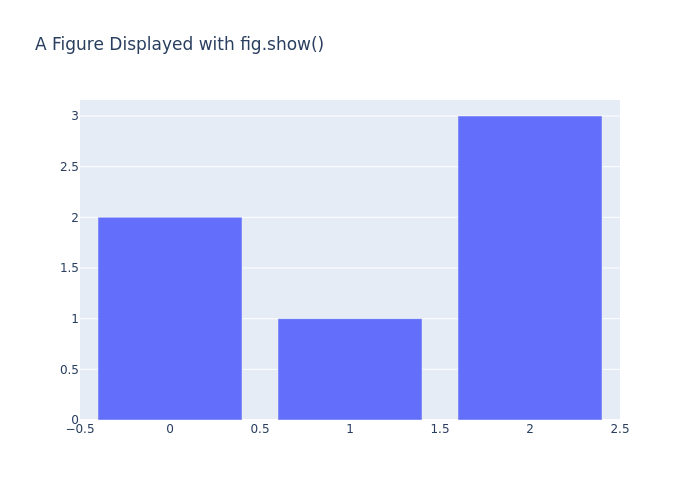

In [43]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with fig.show()"
)
fig.show(renderer="png")

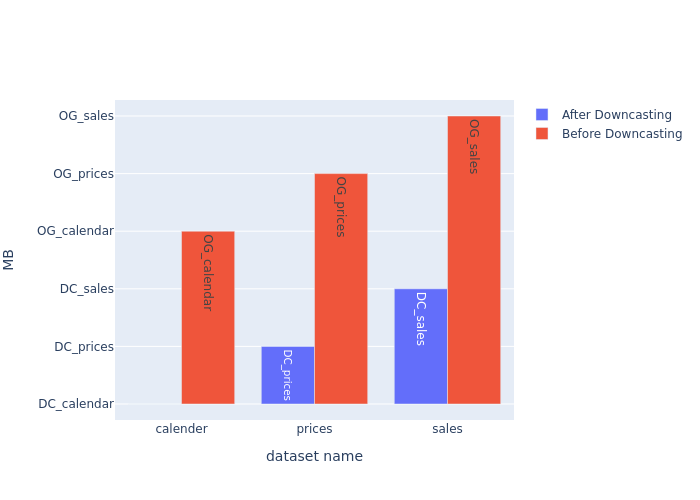

In [46]:
# https://plotly.com/python/bar-charts/
import plotly.graph_objects as go
dataset_name=['calender', 'prices', 'sales']
d1 = ['OG_calendar', 'OG_prices', 'OG_sales']
d2 = ['DC_calendar', 'DC_prices','DC_sales']
fig = go.Figure(data=[
    go.Bar(name='After Downcasting', x=dataset_name, y=d2,text=d2,textposition='auto'),
    go.Bar(name='Before Downcasting', x=dataset_name, y=d1,text=d1,textposition='auto')
])
#Change the bar mode
fig.update_xaxes(title_text='dataset name')
fig.update_yaxes(title_text='MB')
fig.update_layout(barmode='group')
fig.update_xaxes(type='category')
fig.show(renderer="png")

[]

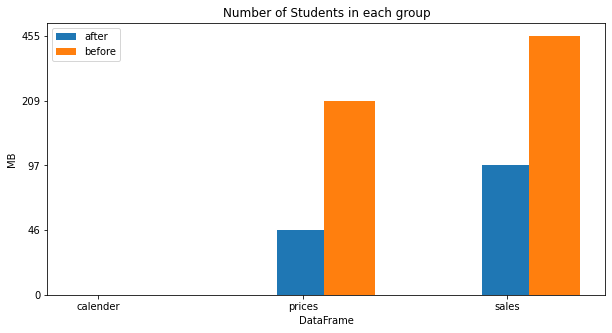

In [47]:
d1 = [OG_calendar, OG_prices, OG_sales]
d2 = [DC_calendar, DC_prices,DC_sales]
x =np.array([1,2,3])
plt.figure(figsize = (10, 5))  
plt.bar(x, d2, 0.25, label = 'Before')
plt.bar(x + 0.23, d1, 0.25, label = 'After')

plt.xlabel("DataFrame")
plt.ylabel("MB")
plt.title("Number of Students in each group")
plt.legend(['after','before'])
plt.xticks([i+1  for i in range(3)], ['calender', 'prices', 'sales'])
plt.plot()

In [48]:
sales_bd = np.round(sales_train_evaluation.memory_usage().sum()/(1024*1024),1)
calendar_bd = np.round(calendar.memory_usage().sum()/(1024*1024),1)
prices_bd = np.round(sales_prices.memory_usage().sum()/(1024*1024),1)

In [49]:
sales_ad = np.round(sales.memory_usage().sum()/(1024*1024),1)
calendar_ad = np.round(calendar.memory_usage().sum()/(1024*1024),1)
prices_ad = np.round(prices.memory_usage().sum()/(1024*1024),1)

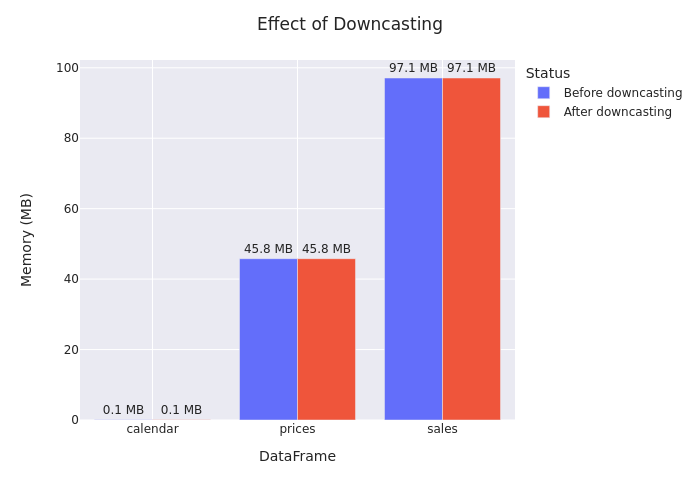

In [51]:
dic = {'DataFrame':['sales','calendar','prices'],
       'Before downcasting':[sales_bd,calendar_bd,prices_bd],
       'After downcasting':[sales_ad,calendar_ad,prices_ad]}

memory = pd.DataFrame(dic)
memory = pd.melt(memory, id_vars='DataFrame', var_name='Status', value_name='Memory (MB)')
memory.sort_values('Memory (MB)',inplace=True)
fig = px.bar(memory, x='DataFrame', y='Memory (MB)', color='Status', barmode='group', text='Memory (MB)')
fig.update_traces(texttemplate='%{text} MB', textposition='outside')
fig.update_layout(template='seaborn', title='Effect of Downcasting')
fig.update_xaxes(type='category')
fig.show(renderer="png")

In [18]:
# dawncasting using dawncast function


In [14]:
# https://medium.com/@deepakec1031/how-to-reduce-pandas-data-frame-size-using-downcast-e00cfed8e2c5
RD_sales = reduce(sales_train_evaluation)
RD_prices = reduce(sales_prices)
RD_calendar = reduce(calendar)

In [54]:
# sales_ad = np.round(RD_sales.memory_usage().sum()/(1024*1024),1)
# calendar_ad = np.round(RD_calendar.memory_usage().sum()/(1024*1024),1)
# prices_ad = np.round(RD_prices.memory_usage().sum()/(1024*1024),1)

# measure filesize after downcasting
DC_RD_sales=formatFileSize(RD_sales.memory_usage(index = True).sum(),'B','MB')
DC_RD_prices=formatFileSize(RD_prices.memory_usage(index = True).sum(),'B','MB')
DC_RD_calendar=formatFileSize(RD_calendar.memory_usage(index = True).sum(),'B','MB')

[]

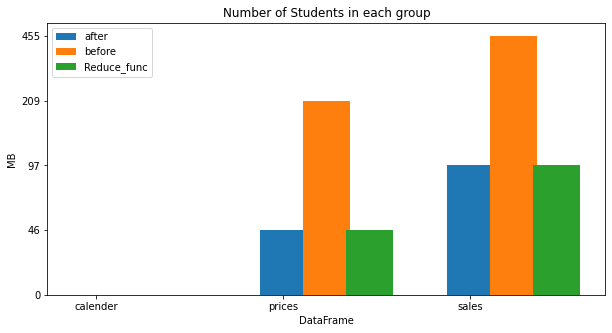

In [55]:
d1 = [OG_calendar, OG_prices, OG_sales]
d2 = [DC_calendar, DC_prices,DC_sales]
d3 = [DC_RD_calendar, DC_RD_prices,DC_RD_sales]
x =np.array([1,2,3])
plt.figure(figsize = (10, 5))  
plt.bar(x, d2, 0.25, label = 'Before')
plt.bar(x + 0.23, d1, 0.25, label = 'After')
plt.bar(x + 0.46, d3, 0.25, label = 'Reduce_func')

plt.xlabel("DataFrame")
plt.ylabel("MB")
plt.title("Number of Students in each group")
plt.legend(['after','before','Reduce_func'])
plt.xticks([i+1  for i in range(3)], ['calender', 'prices', 'sales'])
plt.plot()

## 3. Melting the data

Currently, the data is in three dataframes: sales, prices & calendar. The sales dataframe contains daily sales data with days(d_1 - d_1969) as columns. The prices dataframe contains items' price details and calendar contains data about the days d.

### 3.1 Convert from wide to long format

In this case what the melt function is doing is that it is converting the sales dataframe which is in wide format to a long format. I have kept the id variables as id, item_id, dept_id, cat_id, store_id and state_id. They have in total 30490 unique values when compunded together. Now the total number of days for which we have the data is 1969 days. Therefore the melted dataframe will be having 30490x1969 i.e. 60034810 rows

In [19]:
sales = reduce(sales_train_evaluation)
prices = reduce(sales_prices)
calendar = reduce(calendar)

In [20]:
sales

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,...,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,1,0,...,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,1,7,7,3,6,3,3,7,12,4,2,7,5,12,5,3,3,7,6,4,6,3,6,2,3,...,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,2,2,0,0,0,2,0,0,1,1,1,0,0,1,0,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,1,0,0,0,0,3,1,1,1,2,0,1,0,1,1,1,3,3,4,4,3,6,1,0,1,...,1,2,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,4,7,2,3,5,6,3,4,1,2,5,1,2,2,2,1,9,8,1,6,3,3,4,10,4,...,1,2,1,4,0,0,2,2,4,0,0,0,2,1,0,2,0,1,0,0,1,0,0,0,1,1,0,2,1,1,0,0,1,0,0,1,0,3,3,1,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,1,1,1,1,2,0,1,0,3,0,0,1,0,0,1,0,3,1,3,1,3,0,1,2,1,0,2,1,1,2,0,2,1,1,0,2,1,1,1,1,4,6,0,1,1,1,0


In [ ]:
df = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='sold').dropna()
df

In [ ]:
#Combine price data from prices dataframe and days data from calendar dataset.
df = pd.merge(df, calendar, on='d', how='left')
df = pd.merge(df, prices, on=['store_id','item_id','wm_yr_wk'], how='left') 
df

In [ ]:
# # group = df.groupby(['state_id','store_id','cat_id','dept_id'],as_index=False)['item_id'].count().dropna()
# group['USA'] = 'United States of America'
# group.rename(columns={'state_id':'State','store_id':'Store','cat_id':'Category','dept_id':'Department','item_id':'Count'},inplace=True)
# fig = px.treemap(group, path=['USA', 'State', 'Store', 'Category', 'Department'], values='Count',
#                   color='Count',
#                   color_continuous_scale= px.colors.sequential.Sunset,
#                   title='Walmart: Distribution of items')
# fig.update_layout(template='seaborn')
# fig.show()

In [ ]:
# # https://medium.com/thecyphy/m5-forecasting-accuracy-af6c45fb7d58
# gp = sales.groupby(['state_id','store_id','cat_id','dept_id'],as_index=False)
# gp = gp['item_id'].count().dropna()
# gp['USA'] = 'USA'

# fig = px.treemap(gp.head(), path=['USA', 'state_id', 'store_id', 'cat_id', 'dept_id'], values='item_id',
#                   color='item_id',
#                   color_continuous_scale = 'RdBu',
#                   title='Walmart: Distribution of items')
            
# fig.update_layout(treemapcolorway = ["pink", "lightgray"])
# fig.show()

In [21]:
sales_train_evaluation.groupby(['state_id','store_id','cat_id','dept_id'],as_index=False)['item_id'].count()#.dropna()#.isnull().sum()

,state_id,store_id,cat_id,dept_id,item_id
0,CA,CA_1,FOODS,FOODS_1,216
1,CA,CA_1,FOODS,FOODS_2,398
2,CA,CA_1,FOODS,FOODS_3,823
3,CA,CA_1,FOODS,HOBBIES_1,0
4,CA,CA_1,FOODS,HOBBIES_2,0
...,...,...,...,...,...
625,WI,WI_3,HOUSEHOLD,FOODS_3,0
626,WI,WI_3,HOUSEHOLD,HOBBIES_1,0
627,WI,WI_3,HOUSEHOLD,HOBBIES_2,0
628,WI,WI_3,HOUSEHOLD,HOUSEHOLD_1,532


In [22]:
gp1 = sales.groupby(['state_id','store_id','cat_id','dept_id'],as_index=False)
# gp.head()

In [23]:
gp1 = gp1['item_id'].count().dropna()

In [24]:
gp1.head()

,state_id,store_id,cat_id,dept_id,item_id
0,CA,CA_1,FOODS,FOODS_1,216
1,CA,CA_1,FOODS,FOODS_2,398
2,CA,CA_1,FOODS,FOODS_3,823
3,CA,CA_1,FOODS,HOBBIES_1,0
4,CA,CA_1,FOODS,HOBBIES_2,0


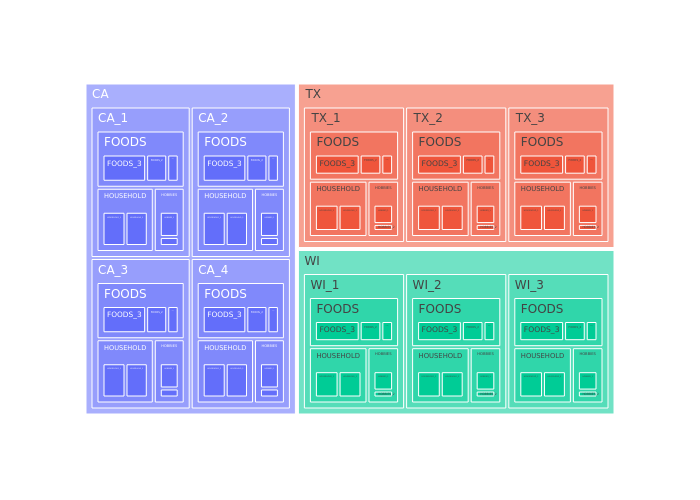

In [25]:
fig=px.treemap(gp1, path=['state_id', 'store_id', 'cat_id', 'dept_id'], values='item_id')
fig.show(renderer="png")

In the data there are 3 states, 10 stores, 3 categories, 7 departments and 3049 items.
a. States are CA, TX and WI.
b. Stores are CA_1, CA_2, CA_3, CA_4(CA), TX_1,TX_2, TX_3(TX) and W1_1, WI_2, WI_3(WI).
c. Categories are FOODS, HOUSEHOLD and HOBBIES.
d. Departments are FOODS_1, FOODS_2, FOODS_3(FOODS), HOUSEHOLD_1, HOUSEHOLD_2(HOUSEHOLD) AND HOBBIES_1, HOBBIES_2(HOBBIES).

In [1]:
#check the unique values in finale Df

df_null=Null_data(df)
df_null

NameError: name 'Null_data' is not defined

In [ ]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN


In [ ]:
df["sell_price"].isnull().value_counts()

False    47735397
True     12299413
Name: sell_price, dtype: int64

In [ ]:
# df_final.info()
# prices.isnull(df["sell_price"]).value_counts()

In [ ]:
df.to_csv(PATH+'/sales_clean.csv', index=False)

In [ ]:
df

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60034805,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1969,0,2016-06-19,11621,Sunday,2,6,2016,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0,2.980469
60034806,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1969,0,2016-06-19,11621,Sunday,2,6,2016,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0,2.480469
60034807,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1969,0,2016-06-19,11621,Sunday,2,6,2016,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0,3.980469
60034808,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1969,0,2016-06-19,11621,Sunday,2,6,2016,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0,1.280273


In [ ]:
!ls -al /content/drive/MyDrive/M5/sales_clean.csv

-rw------- 1 root root 7662969986 Jul 26 03:32 /content/drive/MyDrive/M5/sales_clean.csv


In [ ]:
df.to_pickle(PATH+'/sales_clean.pkl')